# Linear Regression

## Concept Summary

Linear regression models the relationship between a dependent variable $y$ and one or more independent variables $X$ by fitting a linear equation:

$$\hat{y} = w \cdot X + b$$

where:
- $w$ (weights) — how much each feature contributes to the prediction
- $b$ (bias) — the baseline prediction when all features are zero

### Key Concepts

| Concept | Formula | Purpose |
|---------|---------|--------|
| **Hypothesis** | $f_{w,b}(x) = wx + b$ | Predict output given input |
| **Cost Function (MSE)** | $J(w,b) = \frac{1}{2m} \sum_{i=1}^{m}(f_{w,b}(x^{(i)}) - y^{(i)})^2$ | Measure how wrong the model is |
| **Gradient Descent** | $w = w - \alpha \frac{\partial J}{\partial w}$ | Iteratively minimize the cost |

### Learning Objectives

- **Level 1**: Implement linear regression from scratch using NumPy
- **Level 2**: Use scikit-learn to achieve the same result

---

# Level 1: Linear Regression from Scratch

In this section, you will implement:
1. The cost function
2. The gradient computation
3. Gradient descent
4. Prediction

Use only **NumPy** — no scikit-learn allowed here!

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

## 1.1 Generate Synthetic Data

We start with a simple dataset so you can verify your implementation easily.

The true relationship is: $y = 3x + 7 + \text{noise}$

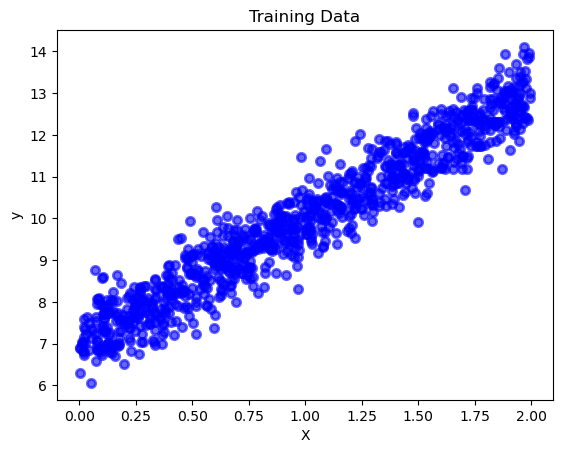

X_train shape: (1000,)
y_train shape: (1000,)


In [23]:
# Generate training data
m = 1000  # number of training examples
X_train = 2 * np.random.rand(m)
# print(X_train)
y_train = 3 * X_train + 7 + np.random.randn(m) * 0.5
# print(y_train)

# Visualize
plt.scatter(X_train, y_train, alpha=0.6, color="blue", linewidth=2)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Training Data")
plt.show()

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

## 1.2 Implement the Cost Function

The Mean Squared Error cost function:

$$J(w, b) = \frac{1}{2m} \sum_{i=1}^{m} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$

where $f_{w,b}(x) = wx + b$

In [24]:
def compute_cost(X, y, w, b):
    """
    Compute the MSE cost for linear regression.

    Args:
        X (np.ndarray): Input features, shape (m,)
        y (np.ndarray): Target values, shape (m,)
        w (float): Weight parameter
        b (float): Bias parameter

    Returns:
        float: The MSE cost
    """
    m = len(X)

    # Step 1: Compute predictions (f_wb) for all training examples
    # Step 2: Compute the squared errors
    # Step 3: Return the mean (divided by 2m)

    predictions = w * X + b
    errors = predictions - y
    cost = np.sum(errors**2) / (2 * m)
    return cost

In [25]:
# --- Validation: Cost Function ---
# With w=3, b=7 (close to the true values), cost should be small (~0.12)
# With w=0, b=0 (bad guess), cost should be large (~35)

cost_good = compute_cost(X_train, y_train, w=3, b=7)
cost_bad = compute_cost(X_train, y_train, w=0, b=0)

print(f"Cost with w=3, b=7 (good guess): {cost_good:.4f}  (expected: ~0.12)")
print(f"Cost with w=0, b=0 (bad guess):  {cost_bad:.4f}  (expected: ~35)")

Cost with w=3, b=7 (good guess): 0.1212  (expected: ~0.12)
Cost with w=0, b=0 (bad guess):  51.3878  (expected: ~35)


## 1.3 Implement the Gradient

Compute the partial derivatives of $J$ with respect to $w$ and $b$:

$$\frac{\partial J}{\partial w} = \frac{1}{m} \sum_{i=1}^{m} (f_{w,b}(x^{(i)}) - y^{(i)}) \cdot x^{(i)}$$

$$\frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} (f_{w,b}(x^{(i)}) - y^{(i)})$$

In [30]:
def compute_gradient(X, y, w, b):
    """
    Compute the gradients of the cost function w.r.t. w and b.

    Args:
        X (np.ndarray): Input features, shape (m,)
        y (np.ndarray): Target values, shape (m,)
        w (float): Weight parameter
        b (float): Bias parameter

    Returns:
        tuple: (dj_dw, dj_db) — partial derivatives of J w.r.t. w and b
    """
    m = len(X)

    # Step 1: Compute predictions (f_wb)
    # Step 2: Compute the error (prediction - actual)
    # Step 3: Compute dj_dw (mean of error * X)
    # Step 4: Compute dj_db (mean of error)

    predictions = w * X + b
    error = predictions - y
    dj_dw = np.sum(error * X) / m
    dj_db = np.sum(error) / m
    return dj_dw, dj_db

In [31]:
# --- Validation: Gradient ---
# At w=0, b=0, gradients should be negative (need to increase w and b)

dj_dw, dj_db = compute_gradient(X_train, y_train, w=0, b=0)
print(f"dj_dw at (w=0, b=0): {dj_dw:.4f}  (expected: negative, around -11)")
print(f"dj_db at (w=0, b=0): {dj_db:.4f}  (expected: negative, around -8)")

dj_dw at (w=0, b=0): -10.9308  (expected: negative, around -11)
dj_db at (w=0, b=0): -9.9772  (expected: negative, around -8)


## 1.4 Implement Gradient Descent

Repeatedly update $w$ and $b$ using the gradients:

$$w = w - \alpha \frac{\partial J}{\partial w}$$
$$b = b - \alpha \frac{\partial J}{\partial b}$$

where $\alpha$ is the learning rate.

In [33]:
def gradient_descent(X, y, w_init, b_init, learning_rate, num_iterations):
    """
    Run gradient descent to learn w and b.

    Args:
        X (np.ndarray): Input features, shape (m,)
        y (np.ndarray): Target values, shape (m,)
        w_init (float): Initial weight
        b_init (float): Initial bias
        learning_rate (float): Step size (alpha)
        num_iterations (int): Number of gradient descent steps

    Returns:
        tuple: (w, b, cost_history)
            - w: learned weight
            - b: learned bias
            - cost_history: list of cost values at each iteration
    """
    w = w_init
    b = b_init
    cost_history = []

    for i in range(num_iterations):
        # Step 1: Compute the gradients using your compute_gradient function
        # Step 2: Update w and b simultaneously
        # Step 3: Record the cost for plotting
        dj_dw, dj_db = compute_gradient(X, y, w, b)
        w = w - learning_rate * dj_dw
        b = b - learning_rate * dj_db

        # Print progress every 100 iterations
        if i % 100 == 0:
            cost = compute_cost(X, y, w, b)
            cost_history.append(cost)
            print(f"Iteration {i:4d}: Cost = {cost:.6f}, w = {w:.4f}, b = {b:.4f}")

    return w, b, cost_history

In [34]:
# --- Run Gradient Descent ---
w_final, b_final, cost_history = gradient_descent(
    X_train, y_train, w_init=0, b_init=0, learning_rate=0.1, num_iterations=1000
)

print(f"\nLearned parameters: w = {w_final:.4f}, b = {b_final:.4f}")
print(f"Expected (approx):  w = 3.0000, b = 7.0000")

Iteration    0: Cost = 31.859864, w = 1.0931, b = 0.9977
Iteration  100: Cost = 0.159837, w = 3.4517, b = 6.4580
Iteration  200: Cost = 0.122861, w = 3.0896, b = 6.8839
Iteration  300: Cost = 0.121194, w = 3.0128, b = 6.9744
Iteration  400: Cost = 0.121119, w = 2.9964, b = 6.9936
Iteration  500: Cost = 0.121115, w = 2.9930, b = 6.9976
Iteration  600: Cost = 0.121115, w = 2.9922, b = 6.9985
Iteration  700: Cost = 0.121115, w = 2.9921, b = 6.9987
Iteration  800: Cost = 0.121115, w = 2.9920, b = 6.9987
Iteration  900: Cost = 0.121115, w = 2.9920, b = 6.9987

Learned parameters: w = 2.9920, b = 6.9987
Expected (approx):  w = 3.0000, b = 7.0000


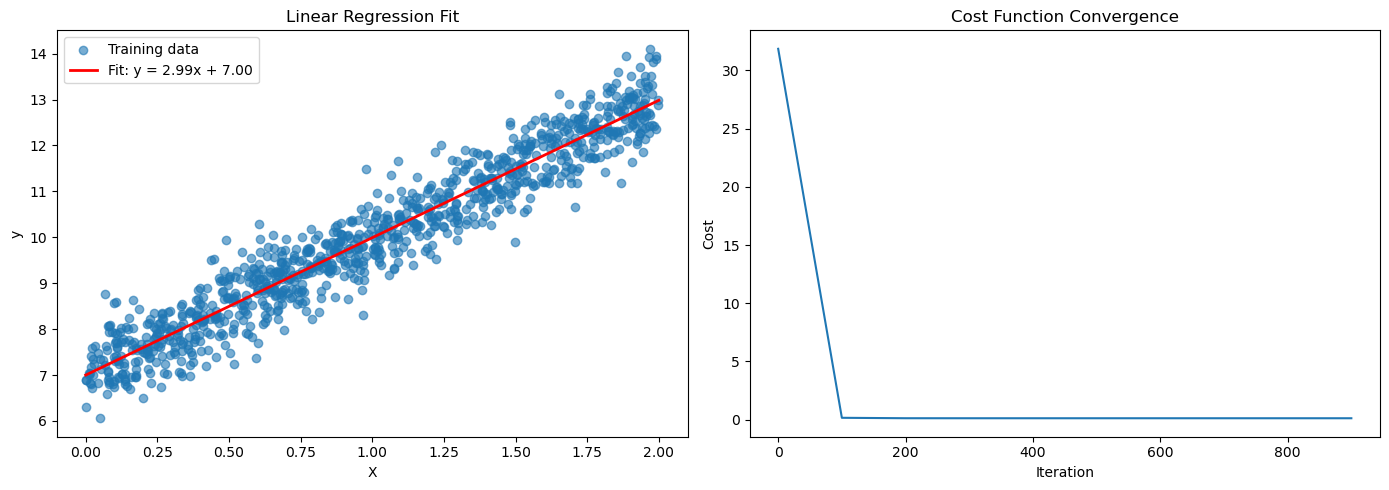

In [35]:
# --- Visualize Results ---

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Data and fitted line
axes[0].scatter(X_train, y_train, alpha=0.6, label="Training data")
x_line = np.linspace(0, 2, 100)
axes[0].plot(
    x_line,
    w_final * x_line + b_final,
    color="red",
    linewidth=2,
    label=f"Fit: y = {w_final:.2f}x + {b_final:.2f}",
)
axes[0].set_xlabel("X")
axes[0].set_ylabel("y")
axes[0].set_title("Linear Regression Fit")
axes[0].legend()

# Plot 2: Cost over iterations
axes[1].plot(range(0, 1000, 100), cost_history)
axes[1].set_xlabel("Iteration")
axes[1].set_ylabel("Cost")
axes[1].set_title("Cost Function Convergence")

plt.tight_layout()
plt.show()

---

## Next Steps

Level 1 complete! Continue to:
- **Level 2**: `linear_regression_sklearn.ipynb` — Reimplement using scikit-learn and compare results
- **Level 3**: `linear_regression_real_world.ipynb` — Apply to the California Housing dataset with production-style code